In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("BTC-Daily.csv").drop_duplicates().dropna()
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


2014-11-28 to 2022-03-01


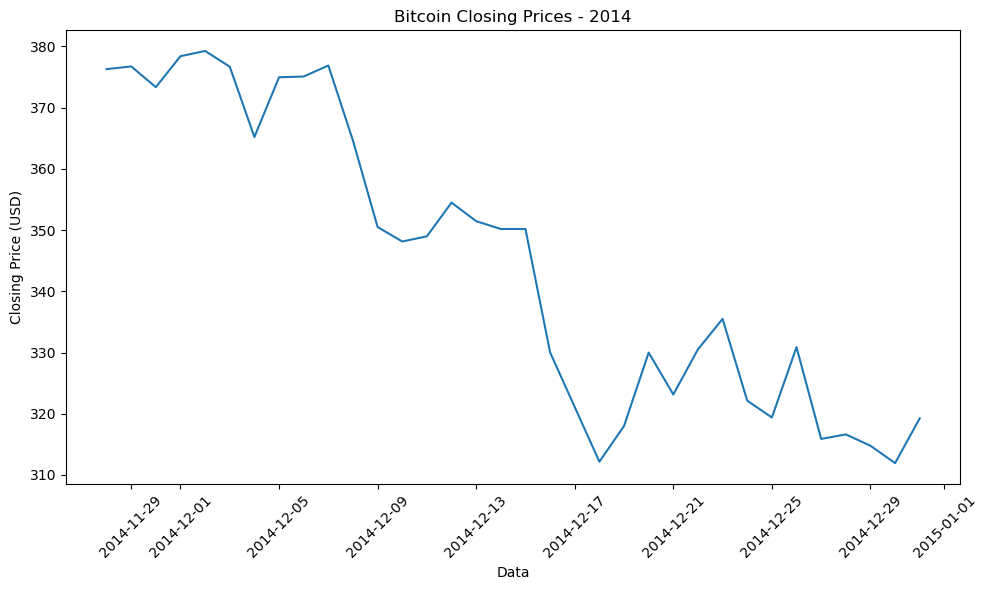

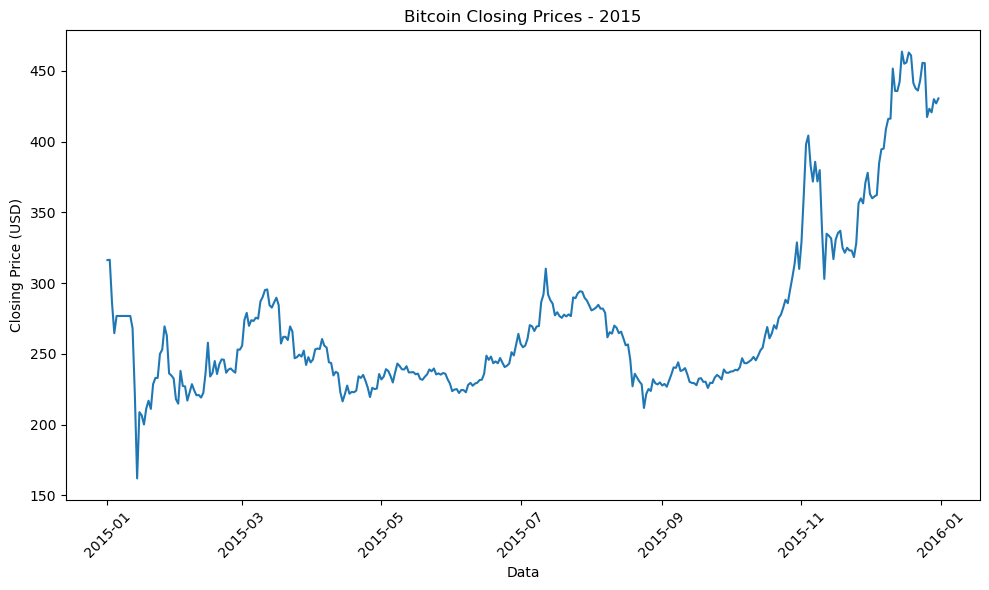

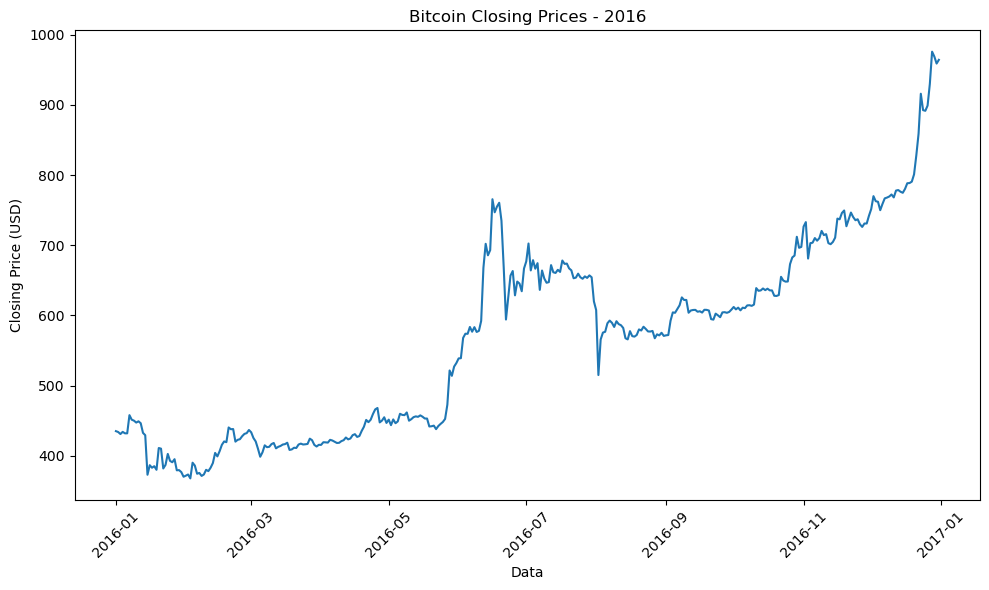

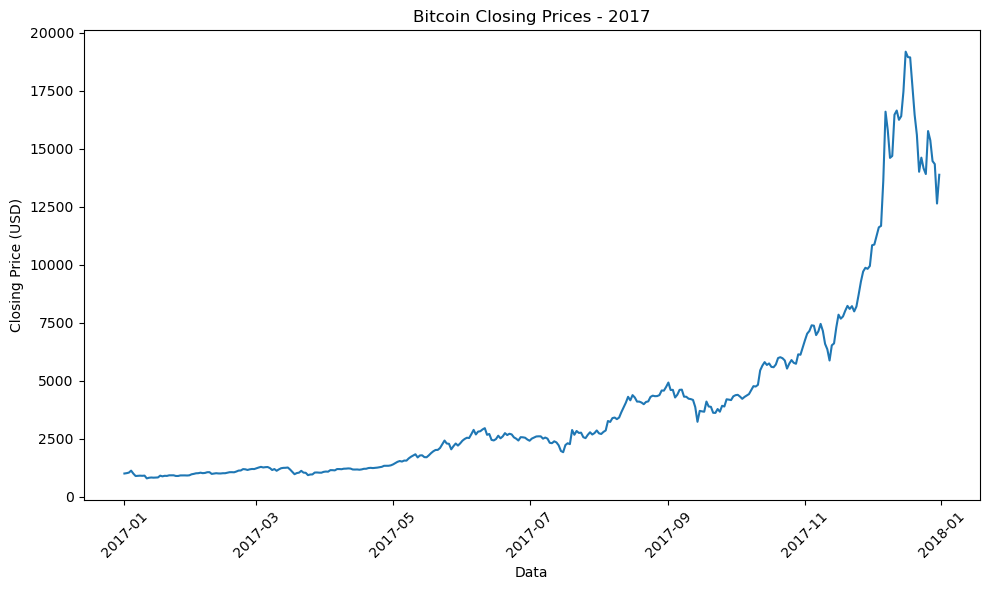

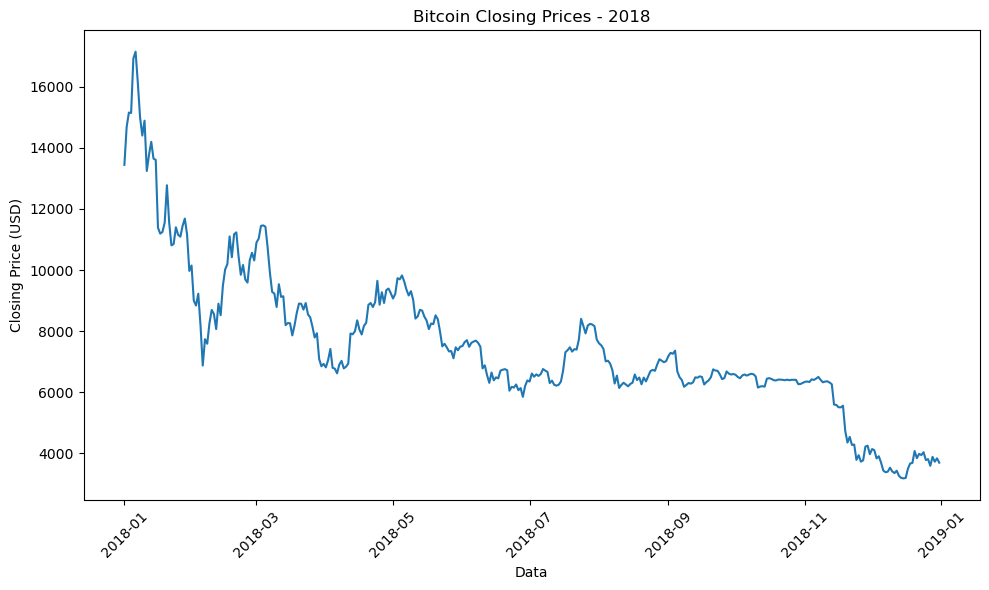

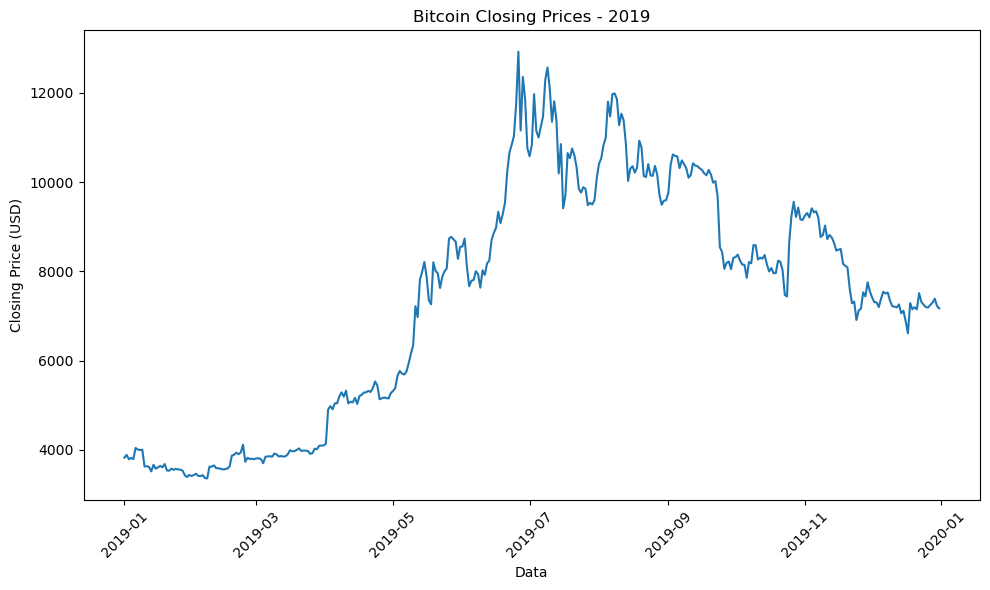

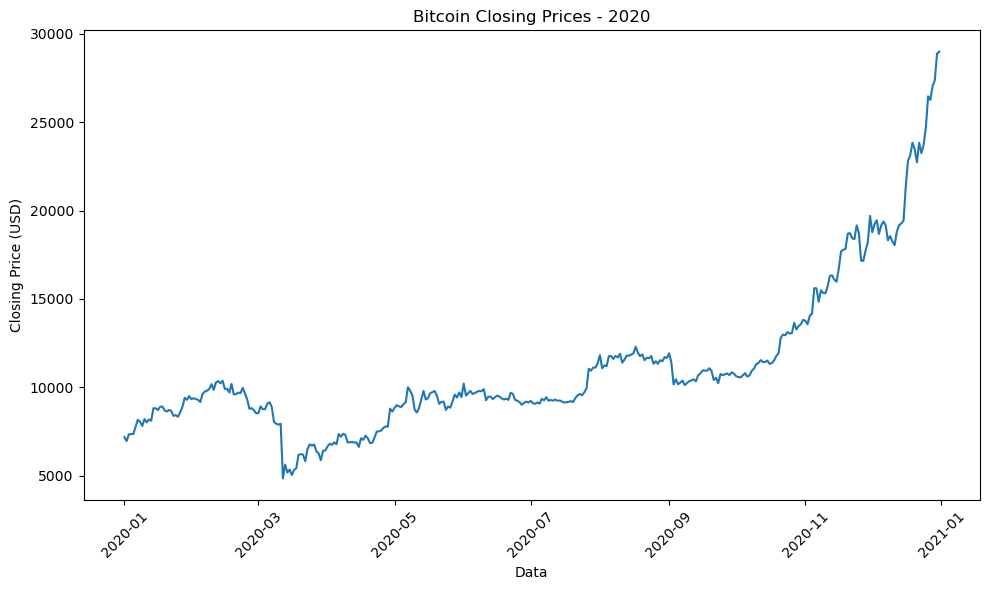

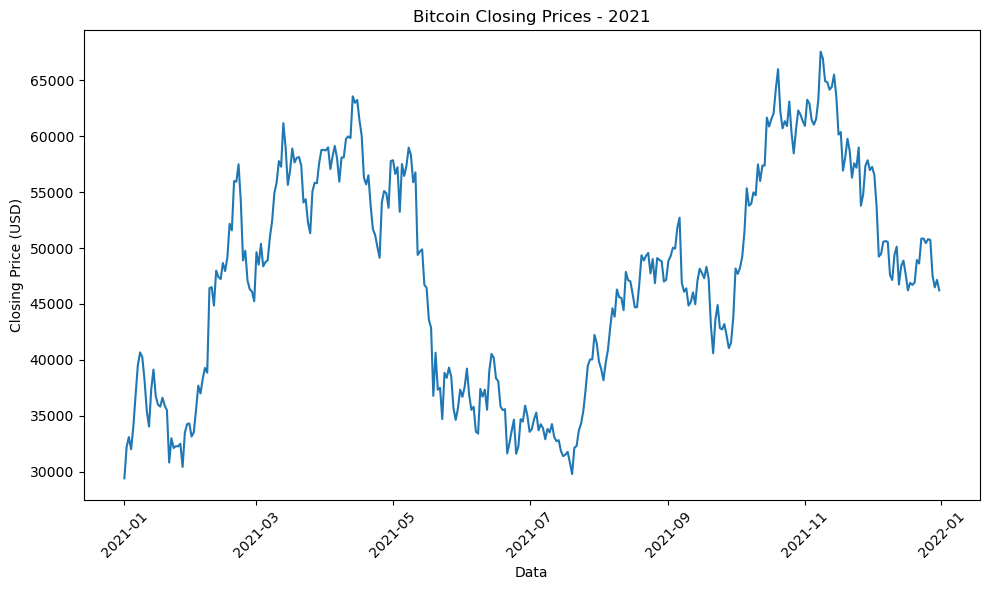

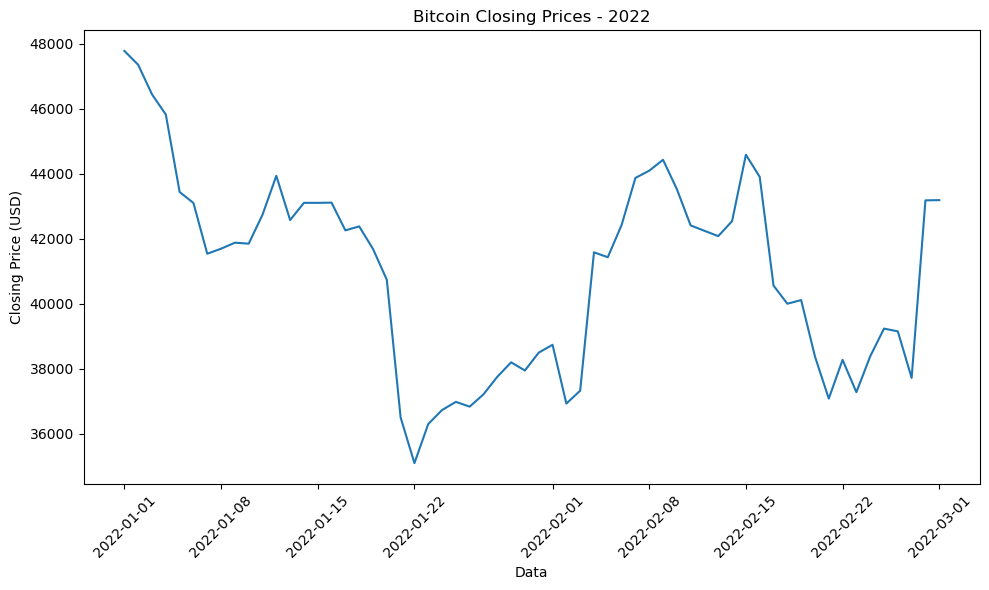

In [4]:
df["date"] = pd.to_datetime(df["date"])
date_range = str(df['date'].dt.date.min()) +  ' to ' +str(df['date'].dt.date.max())
print(date_range)
################ Your code here ################
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
unique_years = sorted(df.year.unique().tolist()) #Các năm hiện có
all_dates = pd.date_range(start = df.date.dt.date.min(), end = df.date.dt.date.max(), freq = "D") #Tất cả các ngày có thể
year_month_day = pd.DataFrame({'date': all_dates}) #DF chứa các ngày có thể
year_month_day['year'] = year_month_day.date.dt.year
year_month_day['month'] = year_month_day.date.dt.month
year_month_day['day'] = year_month_day.date.dt.day
for year in unique_years:
    ################ Your code here ################
    yearly_data = year_month_day[year_month_day['date'].dt.year == year] #Dữ liêu con của năm hiện tại

    merged_data = pd.merge(yearly_data, df, on = ["year", "month", "day"], how = 'left')
    plt.figure(figsize = (10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Data')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

Question 4: Number of charts

In [5]:
print(len(unique_years))

9


In [6]:
!pip install mplfinance

C:\Users\nguye\AppData\Local\Temp\ipykernel_6580\2543203943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


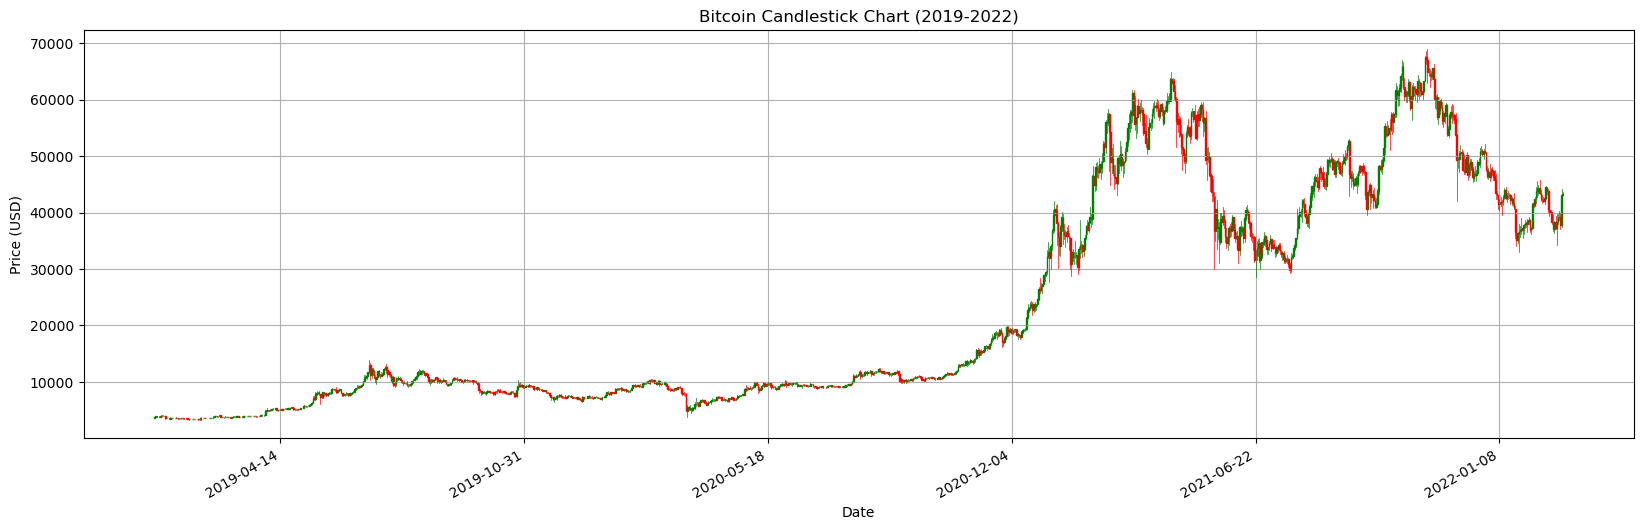

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]
# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

Question 5+ 6 + 7 + 8: Question about function

In [23]:
def predict(X, w, b):
    return X.dot(w.T) + b
    
def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot ( loss )/ len ( y )
    db = np.sum ( loss ) / len ( y )
    cost = np.sum ( loss **2) /(2* len ( y ) )
    return (dw, db, cost)

def update_weight(w,b, lr, dw, db):
    w_new = w - dw.T * lr
    b_new = b - db.T * lr
    return (w_new, b_new)

In [9]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,2022,3,1
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,2022,2,28
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,2022,2,27
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,2022,2,26
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,2022,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014,12,2
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014,12,1
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014,11,30
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014,11,29


In [24]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scalar = StandardScaler()

data = df.drop(columns=['unix', 'date', 'symbol', 'year', 'month', 'day'])

data = pd.DataFrame(scalar.fit_transform(data),columns = data.columns)

X, y = data[['open', 'high', 'low', 'Volume BTC', 'Volume USD']], data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

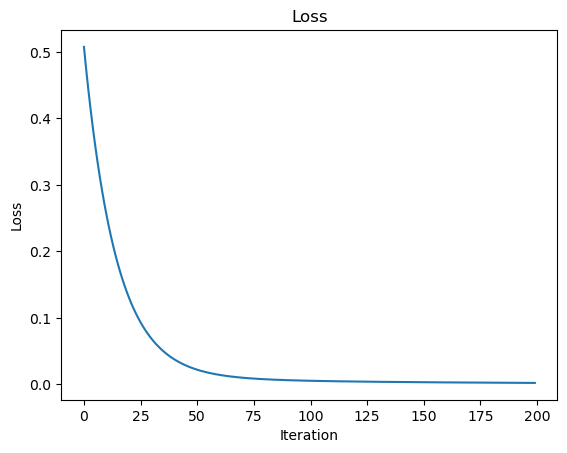

In [25]:
import numpy as np
# Model training
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features) # Initialize weights
    b = 0 # Initialize bias
    losses = []
    
    for _ in range ( num_iterations ) :
        y_hat = predict (X , w , b )
        dw , db , cost = gradient ( y_hat , y , X )
        w , b = update_weight (w , b , learning_rate , dw , db )
        losses.append ( cost ) 
    
    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

Question 9: MRSE, MAE and R^2

In [27]:
# Model evaluation
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE): ", round(rmse, 4))
print("Mean Absolute Error (MAE): ", round(mae, 4))
print("Training Accuracy (R-squared): ", round(train_accuracy, 4))
print("Testing Accuracy (R-squared): ", round(test_accuracy, 4))

Root Mean Square Error (RMSE):  0.0744
Mean Absolute Error (MAE):  0.0342
Training Accuracy (R-squared):  0.9958
Testing Accuracy (R-squared):  0.9943


C:\Users\nguye\AppData\Local\Temp\ipykernel_27040\1878097209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_filter['predicted_close'] = df_2019_filter['close'].shift(1)


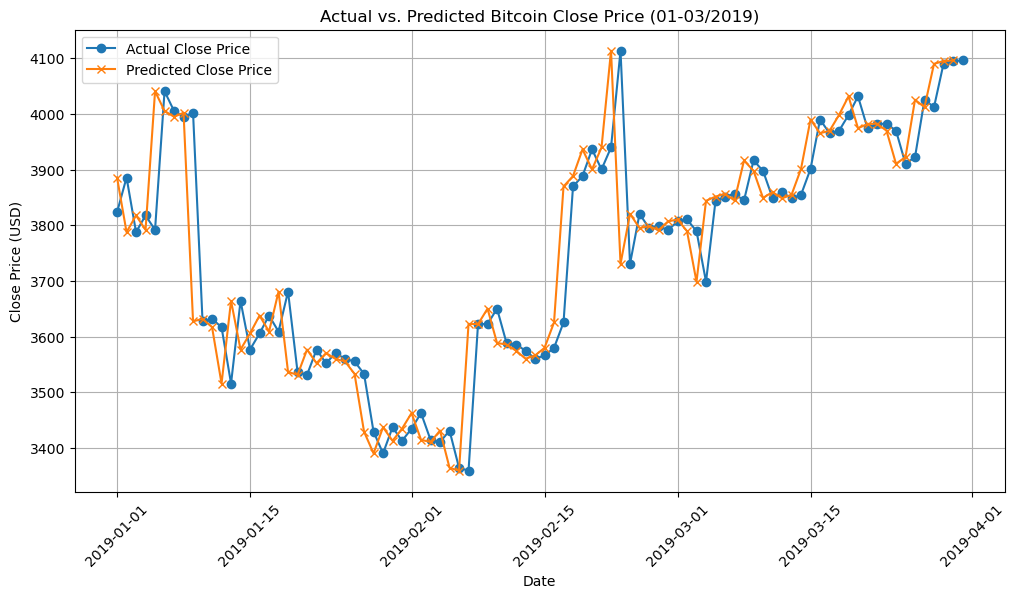

In [ ]:
# Inference
# Filter data for 2019-01-01 to 2019-04-01
df_2019_filter = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

df_2019_filter['predicted_close'] = df_2019_filter['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_filter['date'], df_2019_filter['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_filter['date'], df_2019_filter['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01-03/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()